# World Happiness Report 2024 Analysis 

## Overview
The purpose of this project is to analyze the World Happiness Report 2024 dataset and derive meaningful insights about happiness across different countries. The dataset offers various indicators that contribute to understanding global happiness trends, such as GDP per capita, social support, life expectancy, and more. The data used in this project is sourced from the World Happiness Report ([kaggle dataset source](https://www.kaggle.com/datasets/abdullah0a/world-happiness-data-2024-explore-life)), which is an annual publication that ranks countries based on their happiness levels, considering several socio-economic and environmental factors.

# Questions to Answer

1. Which countries are the happiest and why?

2. Are there geographical trends in happiness?

3. How has happiness evolved globally over the years?

4. Which countries have seen the greatest changes in happiness over time?

5. Which factors have the most significant impact on happiness?

6. What is the relationship between GDP and happiness?

7. How do perceptions of corruption correlate with happiness?

8. How do freedom to make life choices and happiness relate?

## Tools I Used
- **Python**: Primary programming language used.
- **GeoPandas**: For handling and visualizing geographic data.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization.
- **Jupyter Notebook**: For creating an interactive document.

# Description of EDA Steps:

 - Load the Data: The dataset is loaded and basic information is displayed.
 
 - Missing Data Check: The presence of any missing values is evaluated.

 - Descriptive Statistics: Summary statistics for each variable are shown.

 - Distribution Visualization: Histograms for Life Ladder, Social Support, and Log GDP per capita are plotted to visualize their distributions.

 - Correlation Analysis: A heatmap shows correlations between different variables, helping identify potential 
 relationships.

## Exploratory Data Analysis

### Load the Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/Users/bartlomiejpodstawek/PycharmProjects/analiza_danych_projekt/project_world_happiness_report_2024_analyze(python)/world_happiness_report_2024.csv')

### Check Basic Information and Missing Data

In [5]:
# Check basic information about the data
print(df.shape)

(2363, 11)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [7]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


### Cleaning Data and Descriptive Statistics

In [8]:
# Remove rows with missing values
df_cleaned = df.dropna()

print(f"Shape: {df_cleaned.shape}")

Shape: (2097, 11)


In [9]:
# Check if we have duplicates rows
duplicates = df_cleaned[df_cleaned.duplicated() == True]

print(duplicates)

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [10]:
# Check descriptive statistics
print(df_cleaned.describe())

              year  Life Ladder  Log GDP per capita  Social support  \
count  2097.000000  2097.000000         2097.000000     2097.000000   
mean   2014.901288     5.466517            9.356037        0.807032   
std       4.965942     1.136941            1.154677        0.123677   
min    2005.000000     2.178809            5.526723        0.290184   
25%    2011.000000     4.611607            8.464981        0.736480   
50%    2015.000000     5.433173            9.496820        0.833816   
75%    2019.000000     6.290690           10.319510        0.905080   
max    2023.000000     7.970892           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2097.000000                   2097.000000   
mean                          63.271555                      0.748863   
std                            7.003554                      0.138801   
min                            6.720000                      0.25753

### Visualize Distributions of Key Variables

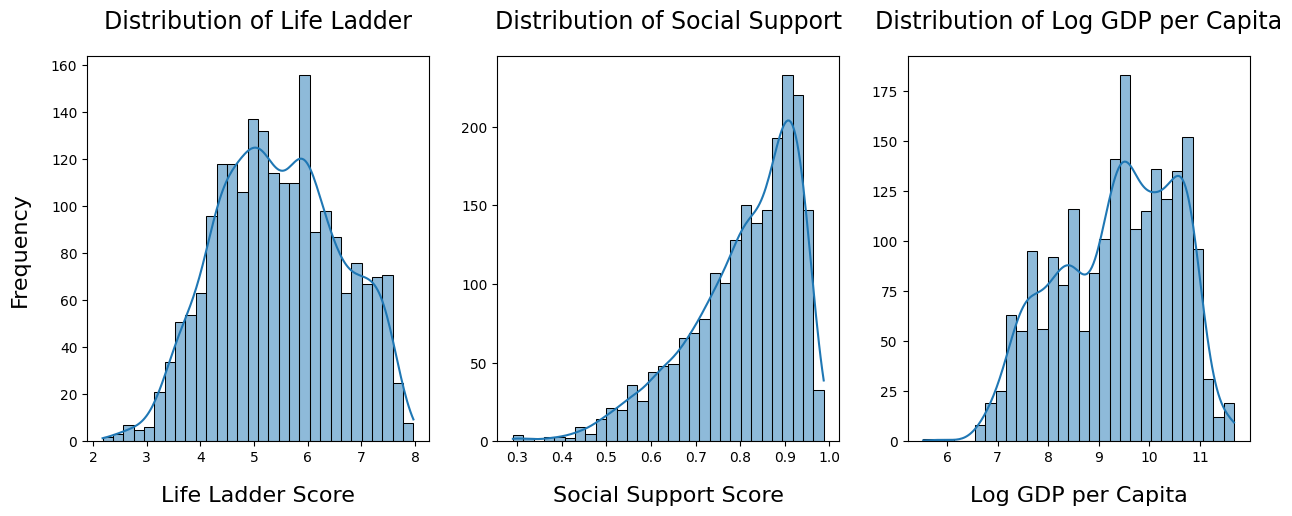

In [11]:
plt.figure(figsize=(15, 5))

# Distribution of Life Ladder
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Life Ladder'], bins=30, kde=True)
plt.title('Distribution of Life Ladder', fontsize=17, pad=20)
plt.xlabel('Life Ladder Score', fontsize=16, labelpad=15)  
plt.ylabel('Frequency', fontsize=16, labelpad=15) 

# Distribution of Social Support
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Social support'], bins=30, kde=True)
plt.title('Distribution of Social Support', fontsize=17, pad=20)
plt.xlabel('Social Support Score', fontsize=16, labelpad=15)  
plt.ylabel('') 

# Distribution of Log GDP per capita
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Log GDP per capita'], bins=30, kde=True)
plt.title('Distribution of Log GDP per Capita', fontsize=17, pad=20)
plt.xlabel('Log GDP per Capita', fontsize=16, labelpad=15)  
plt.ylabel('')

plt.subplots_adjust(wspace=0.2)

plt.show()

### Insights:

Calculating basic descriptive statistics allowed us to understand the ranges and distributions of key variables such as Life Ladder, Log GDP per capita, and Social Support. Visualizing these distributions (histograms with the KDE overlay) allowed us to quickly assess whether the data were normally distributed and whether there were any deviations, which is important for further analysis.

### Correlation Matrix

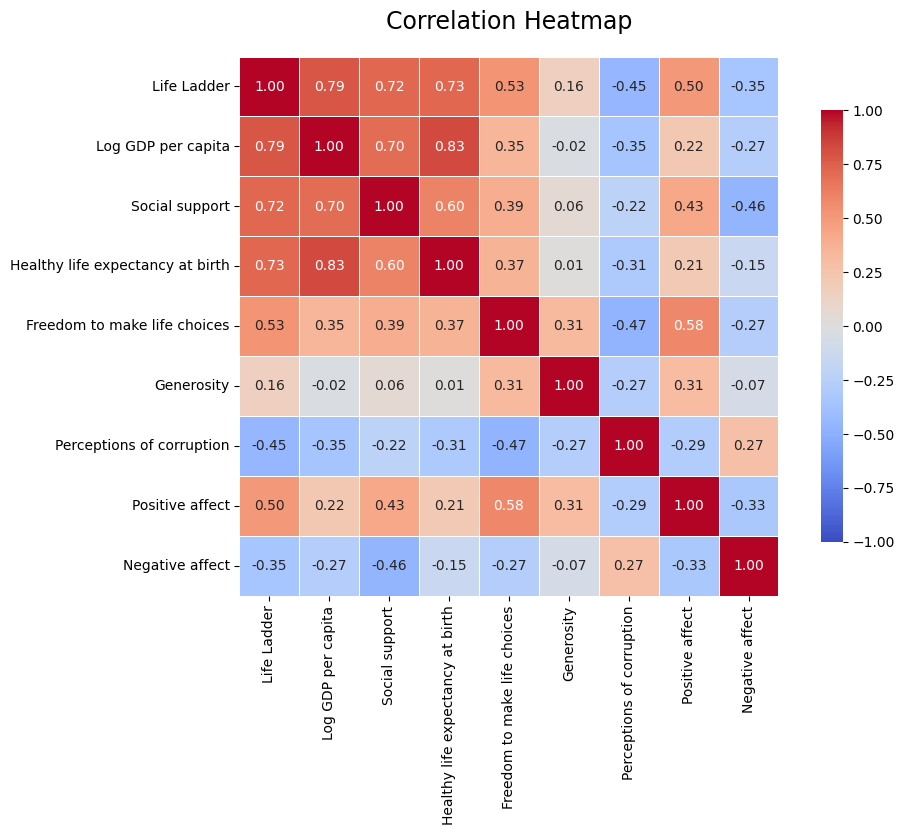

In [12]:
# Correlation Map

plt.figure(figsize=(11, 7))
correlation = df_cleaned[['Life Ladder', 'Log GDP per capita', 'Social support', 
                         'Healthy life expectancy at birth', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption', 'Positive affect', 
                         'Negative affect']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=17, pad=20)
plt.show()

### Insights:

Initial research, such as calculating correlations between variables and statistical analysis, has provided insight into the relationships between key indicators. This preparation is essential for building further models and visualizations that will allow for more detailed conclusions about the factors that affect happiness levels.

## Key Questions to answer:

### Question 1: Which countries are the happiest and why?

In [13]:
# 10 Najszczęśliwszych krajów na świecie
median_life_ladder_by_country = df_cleaned.groupby('Country name')['Life Ladder'].median().reset_index()

top_10_happiest_countries = median_life_ladder_by_country.sort_values(by='Life Ladder', ascending=False).head(10)

# Ustaw indeks na 'Country name'
top_10_happiest_countries.set_index('Country name', inplace=True)

# Zmień nazwę kolumny
top_10_happiest_countries.rename(columns={'Life Ladder': 'Life Ladder Median Value'}, inplace=True)

# Usuń niepotrzebne kolumny (jeśli są)
top_10_happiest_countries = top_10_happiest_countries[['Life Ladder Median Value']]

# Wyświetl wynik
top_10_happiest_countries

,Life Ladder Median Value
Country name,
Finland,7.671538
Denmark,7.593702
Iceland,7.505714
Switzerland,7.492804
Netherlands,7.455422
Norway,7.444262
Canada,7.412773
Sweden,7.374792
Israel,7.320563


### Visualization:

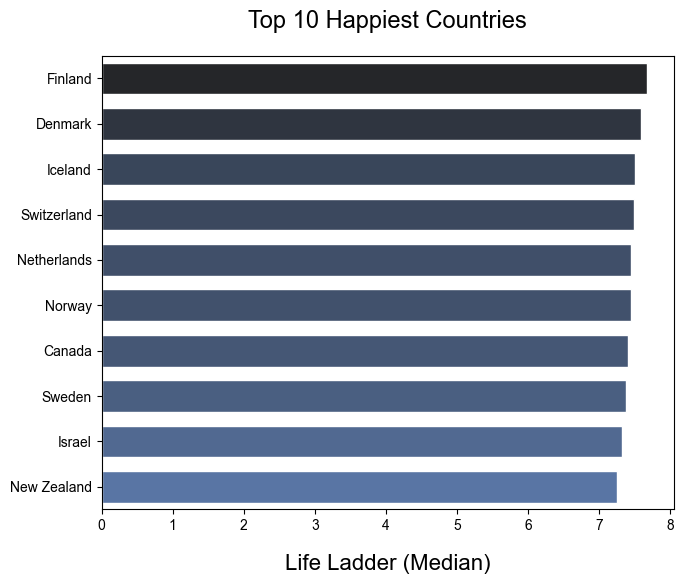

In [14]:
# Top 10 Highest Paid Skills for Data Analysts
fig, ax = plt.subplots(figsize=(7, 6))

sns.set_theme(style='ticks')
sns.barplot(
    data = top_10_happiest_countries,
    x = 'Life Ladder Median Value',
    y = top_10_happiest_countries.index,
    hue = 'Life Ladder Median Value',
    ax = ax,
    palette = 'dark:b_r',
    width = 0.7,
    dodge = False
)
ax.legend().remove()

# top_10_happiest_countries[::-1].plot(kind='barh', y='Life Ladder Median Value' , ax=ax , legend=False)
ax.set_title('Top 10 Happiest Countries', fontsize=17, pad=20)
ax.set_ylabel('')
ax.set_xlabel('Life Ladder (Median)', fontsize=16, labelpad=15)
plt.tight_layout()
plt.show()

In [15]:
# Calculate the median Life Ladder and relevant factors by country
median_happiness_factors = df_cleaned.groupby('Country name')[[
                                                     'Life Ladder',
                                                     'Log GDP per capita', 
                                                     'Healthy life expectancy at birth'
                                                     ]].median().reset_index()
    
# Calculate the mean for 'Social support'
mean_social_support = df_cleaned.groupby('Country name')['Social support'].mean().reset_index()

merged_factors = pd.merge(median_happiness_factors, mean_social_support, on='Country name')    
    
top_happiness_factors = merged_factors.sort_values(by='Life Ladder', ascending=False).head(10)

top_happiness_factors.set_index('Country name', inplace=True)

# Sort the top 10 countries by Life Ladder in ascending order
top_10_indexed = top_happiness_factors.sort_values(by='Life Ladder', ascending=True)

top_10_indexed

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Social support
Country name,,,,
New Zealand,7.257382,10.621686,69.900002,0.951680
Israel,7.320563,10.535632,71.800003,0.908625
Sweden,7.374792,10.838187,71.400002,0.927878
Canada,7.412773,10.767591,71.099998,0.932602
Norway,7.444262,11.066423,71.300003,0.948437
Netherlands,7.455422,10.893921,71.137501,0.930281
Switzerland,7.492804,11.125900,72.099998,0.935003
Iceland,7.505714,10.878072,71.937500,0.978225
Denmark,7.593702,10.888726,70.500000,0.953921


### Visualizations:

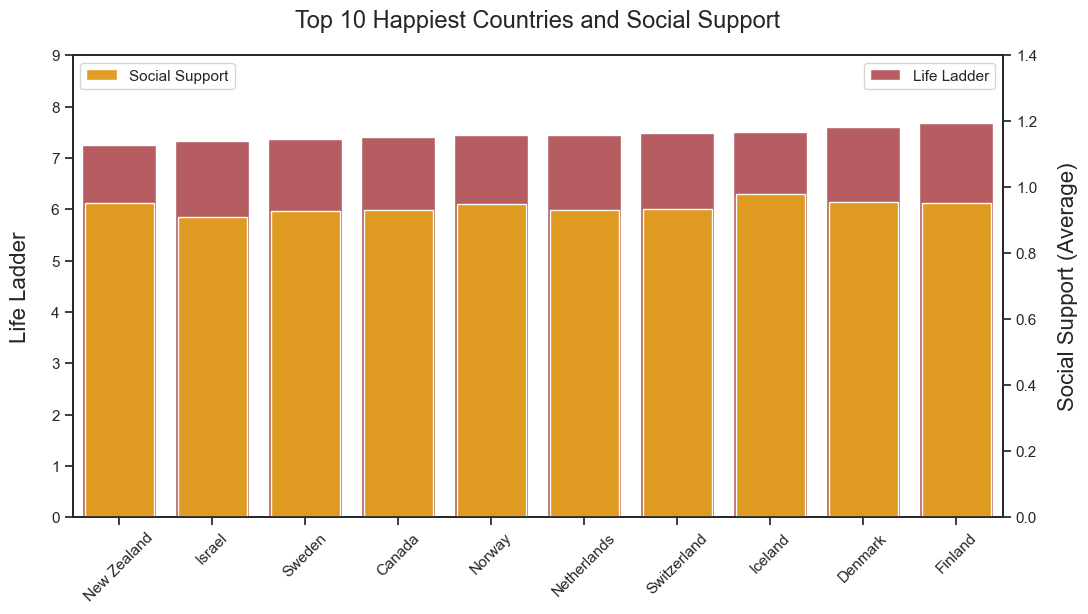

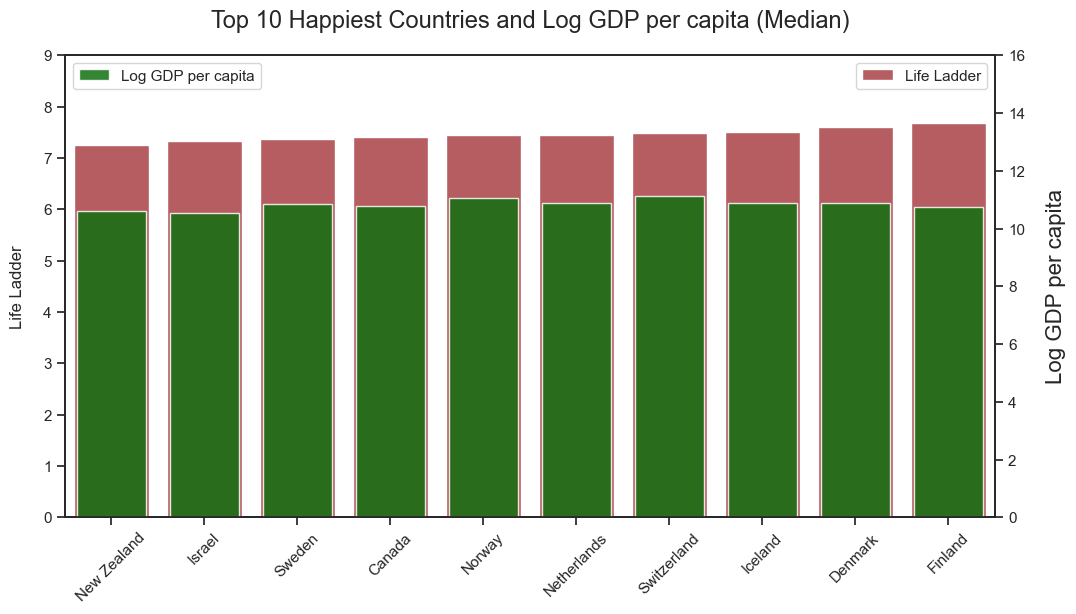

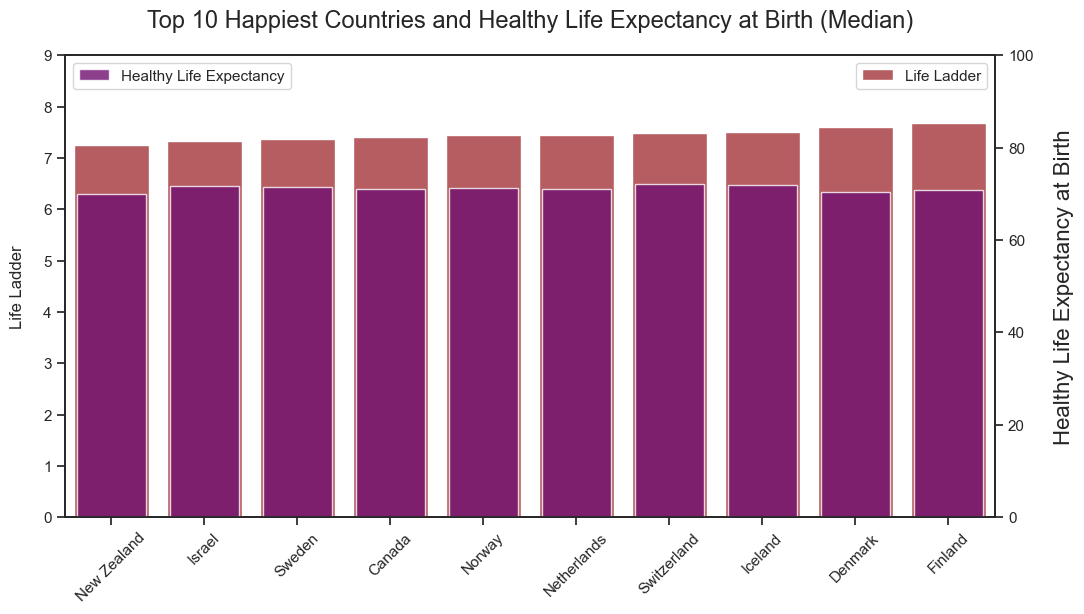

In [28]:
# Plot: Top 10 Happiest Countries with Life Ladder and Social Support
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', fontsize=16, labelpad=15)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Social Support', fontsize=17, pad=20)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Social Support
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Social support'], color='orange', label='Social Support', alpha=0.98, width=0.74)
plt.ylabel('Social Support (Average)', fontsize=16, labelpad=15)
plt.ylim(0, 1.4)

# Legends
plt.legend(loc='upper left')
plt.show()
# Plot: Top 10 Happiest Countries with Life Ladder and Log GDP per capita
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', labelpad=13)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Log GDP per capita (Median)', fontsize=17, pad=20)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Log GDP per capita
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Log GDP per capita'], color='green', label='Log GDP per capita', alpha=0.85, width=0.74)
plt.ylabel('Log GDP per capita', fontsize=16, labelpad=15)
plt.ylim(0,16)

# Legends
plt.legend(loc='upper left')
plt.show()
# Plot: Top 10 Happiest Countries with Life Ladder and Healthy Life Expectancy at Birth
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', labelpad=13)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Healthy Life Expectancy at Birth (Median)', fontsize=17, pad=20)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Healthy Life Expectancy at Birth
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Healthy life expectancy at birth'], color='purple', label='Healthy Life Expectancy', alpha=0.80, width=0.74)
plt.ylabel('Healthy Life Expectancy at Birth', fontsize=16, labelpad=15)
plt.ylim(0,100)

# Legends
plt.legend(loc='upper left')
plt.show()

### Key Insights:

 
**Top Happiest Countries**:
- The happiest countries are mainly located in Northern Europe, with Finland, Denmark, and Iceland leading the list. This suggests a geographical concentration of high happiness levels in these regions.

**Social Support**:
- Social support is a key factor contributing to happiness in these countries. The happiest countries, such as Finland and Denmark, show very high levels of social support. This means people in these regions can rely on help and support from family, friends, or the community, which positively impacts their well-being.

**Log GDP per Capita**:
- Economic prosperity is also an important factor. Countries like Switzerland and Norway have high GDP per capita values, indicating that financial stability and economic opportunities play a crucial role in supporting happiness.

**Healthy Life Expectancy**:
- All top 10 happiest countries have high healthy life expectancy rates, meaning that people in these regions live longer, healthier lives. This is likely due to good healthcare systems and healthy lifestyles, which contribute to higher satisfaction and quality of life.

**Balanced Factors**:
- The happiest countries show a balance between high social support, strong economic indicators, and good health. This combination of factors suggests that happiness is influenced by a mix of community support, financial security, and well-being.

### Question 2: Are there geographical trends in happiness?

In [17]:
import geopandas as gpd

# Geo Data from Natural Earth Data 
world = gpd.read_file('/Users/bartlomiejpodstawek/PycharmProjects/analiza_danych_projekt/project_world_happiness_report_2024_analyze(python)/countries_data/ne_110m_admin_0_countries.shp')

In [18]:
# Replacing country names to ensure consistency with the geographic dataset

df_cleaned.loc[:, 'Country name'] = df_cleaned['Country name'].replace({
'United States': 'United States of America',
'Türkiye': 'Turkey',
'Congo (Kinshasa)': 'Democratic Republic of the Congo',
'Taiwan Province of China': 'Taiwan',
'Eswatini': 'eSwatini'
})

# Merging data based on country names
# Assuming 'Country name' in my dataset matches 'ADMIN' in the GeoDataFrame
merged_data = world.merge(df_cleaned, how='left', left_on='ADMIN', right_on='Country name')

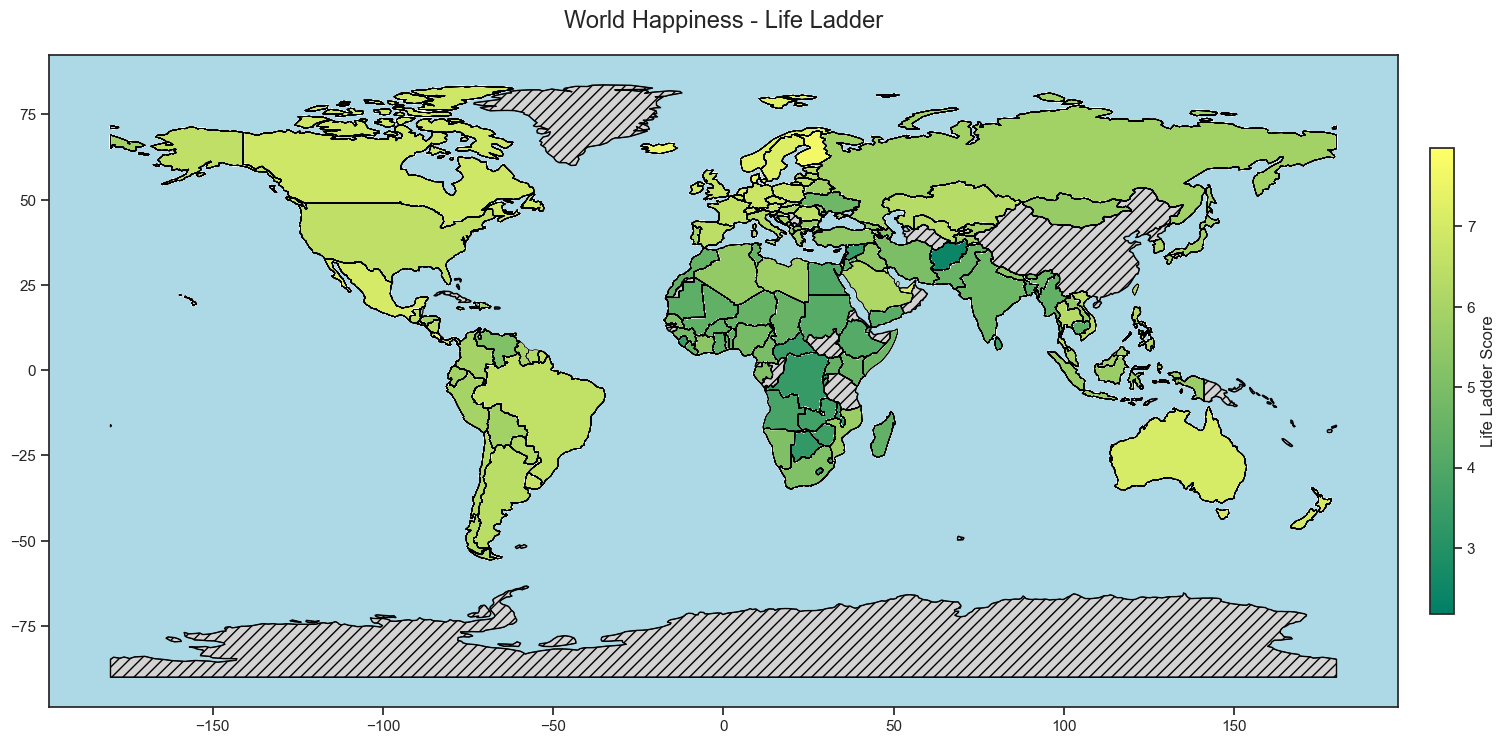

In [19]:
# Plotting
plt.figure(figsize=(17, 17))

# Setting the axis background to blue
ax = plt.gca()
ax.set_facecolor('#ADD8E6')

# Drawing country borders
merged_data.boundary.plot(ax=ax, linewidth=0.6, color='black')

# Using a green-blue color palette
merged_data.plot(column='Life Ladder',
                 ax=ax,
                 legend=True,
                 cmap='summer',  # Color palette
                 legend_kwds={
                     'label': "Life Ladder Score",
                     'orientation': "vertical",  # Vertical legend on the right
                     'shrink': 0.28,  # Shrink the legend size
                     'pad': 0.02,
                     'aspect': 20  # Setting the size of the legend bar
                 },
                 missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///"}
                )

plt.title('World Happiness - Life Ladder', fontsize=17, pad=20)
plt.tight_layout()
plt.show()

### Key Insights:

- Northern Europe stands out as the happiest region, with countries like Finland and Denmark having the highest scores, over 7.

- North America and Australia show relatively high happiness, with scores between 6-7, indicating that developed regions tend to have higher happiness.

- Africa and parts of Asia generally have lower happiness levels, with scores around 4-5, suggesting that developing regions face more challenges in terms of well-being.

- South America shows moderate happiness levels, with most countries scoring between 5-6, indicating some regional variation in well-being.

- Some areas like Greenland, China and parts of Africa, lack data, but overall, happiness levels are higher in developed regions and lower in developing ones.

### Question 3: How has happiness evolved globally over the years?

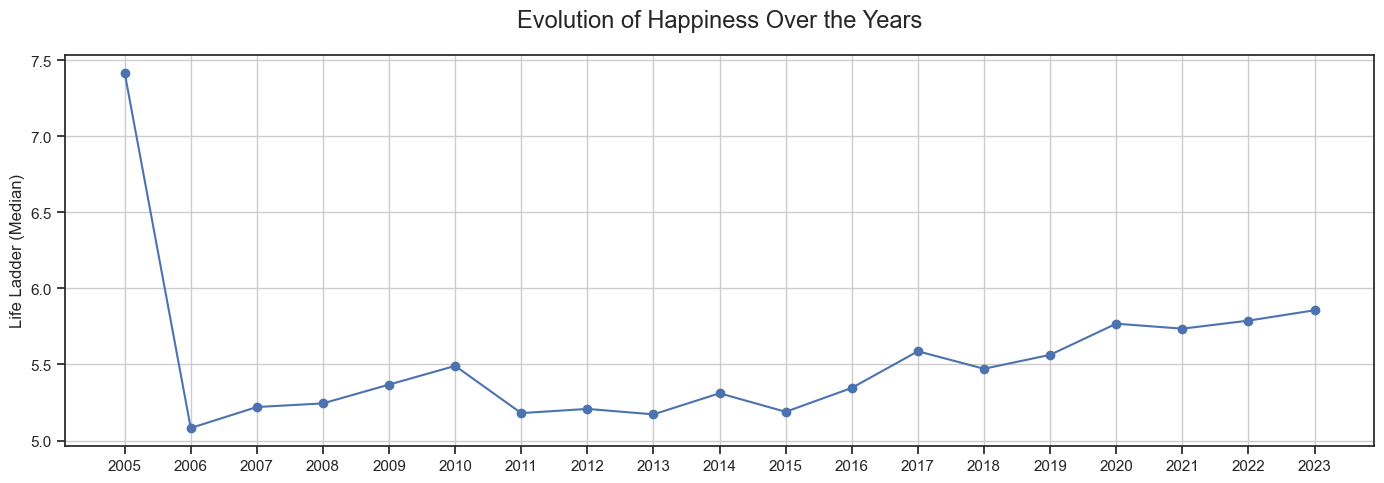

In [20]:
# Calculate the median Life Ladder for each year
median_happiness_per_year = df_cleaned.groupby('year')['Life Ladder'].median()

plt.figure(figsize=(14, 5))
plt.plot(median_happiness_per_year.index, median_happiness_per_year.values, marker='o', linestyle='-')

plt.title('Evolution of Happiness Over the Years', fontsize = 17, pad = 20)  
plt.xlabel('')  
plt.ylabel('Life Ladder (Median)')  
plt.grid(True)
plt.xticks(median_happiness_per_year.index)
plt.tight_layout()
plt.show()

### Key Insights:

- **2005**: Happiness level was very high, with a median Life Ladder value around 7.5.

- **2006**: There was a sudden drop in happiness to a median value of 5. This could be due to global issues or crises.

- **2007**-**2019**: Happiness slowly improved with some ups and downs, indicating gradual recovery but with occasional setbacks.

- **2020**-**2023**: A steady rise in happiness, possibly linked to positive changes and adaptation to challenges like the pandemic.

- **2023**: Happiness reached the highest level since 2006, showing a significant global improvement in well-being.

### Question 4: Which countries have seen the greatest changes in happiness over time?

In [21]:
# Calculate the change in Life Ladder scores for each country over time
happiness_change = df_cleaned.groupby('Country name').agg(
    start_year=('year', 'min'),
    end_year=('year', 'max'),
    start_happiness=('Life Ladder', 'first'),
    end_happiness=('Life Ladder', 'last')
).reset_index()

# Calculate the change in happiness
happiness_change['happiness_change'] = happiness_change['end_happiness'] - happiness_change['start_happiness']

# Sort the countries by happiness change
top_increase = happiness_change.sort_values(by='happiness_change', ascending=False).head(10)
top_decrease = happiness_change.sort_values(by='happiness_change').head(10)

# Combine results for visualization
top_changes = pd.concat([top_increase, top_decrease])

# Display the summary of changes
top_changes[['Country name', 'start_year', 'end_year', 'start_happiness', 'end_happiness', 'happiness_change']]

,Country name,start_year,end_year,start_happiness,end_happiness,happiness_change
101,Nicaragua,2006,2023,4.460158,6.362125,1.901967
20,Bulgaria,2007,2023,3.843798,5.589599,1.745801
119,Serbia,2007,2023,4.750384,6.441014,1.690630
49,Georgia,2006,2023,3.675108,5.350635,1.675527
76,Latvia,2006,2023,4.709502,6.295645,1.586143
108,Paraguay,2006,2023,4.730082,6.213789,1.483706
5,Armenia,2006,2023,4.289311,5.679090,1.389779
74,Kyrgyzstan,2006,2023,4.641399,5.909509,1.268110
135,Tajikistan,2006,2017,4.613099,5.829234,1.216135
138,Togo,2006,2023,3.202429,4.364939,1.162509


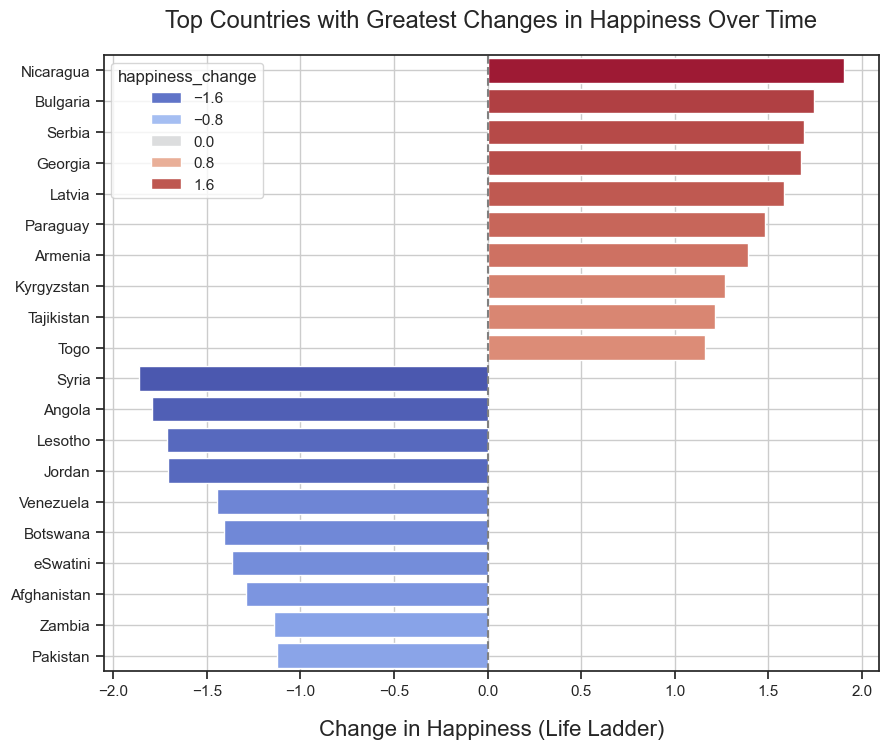

In [22]:
# Visualize the changes in happiness
plt.figure(figsize=(10,8))
sns.barplot(data=top_changes, x='happiness_change', y='Country name', palette='coolwarm', hue='happiness_change')
plt.title('Top Countries with Greatest Changes in Happiness Over Time', fontsize=17, pad=20)
plt.xlabel('Change in Happiness (Life Ladder)', fontsize=16, labelpad=15)
plt.ylabel('')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

### Key Insights:

**Positive Changes**:

- Nicaragua, Bulgaria, and Serbia have seen the largest increases in happiness, with improvements of over 1.5 on the Life Ladder scale. These countries have experienced significant gains in well-being over time.

- Other countries with notable increases include Georgia, Latvia, and Paraguay.

**Negative Changes**:
- On the other hand, Pakistan, Zambia, and Afghanistan have seen the greatest decreases in happiness, with declines close to -2.0 on the Life Ladder scale. These countries have faced significant challenges that have led to a drop in well-being.

- Other countries with significant decreases include Botswana, Venezuela, and Jordan.


### Question 5: Which factors have the most significant impact on happiness?

In [23]:
# Calculate correlation coefficients for relevant factors
correlation_matrix = df_cleaned[['Life Ladder', 'Social support', 'Log GDP per capita', 'Healthy life expectancy at birth']].corr()

correlation_matrix

,Life Ladder,Social support,Log GDP per capita,Healthy life expectancy at birth
Life Ladder,1.000000,0.724916,0.787122,0.725232
Social support,0.724916,1.000000,0.699005,0.602140
Log GDP per capita,0.787122,0.699005,1.000000,0.832139
Healthy life expectancy at birth,0.725232,0.602140,0.832139,1.000000


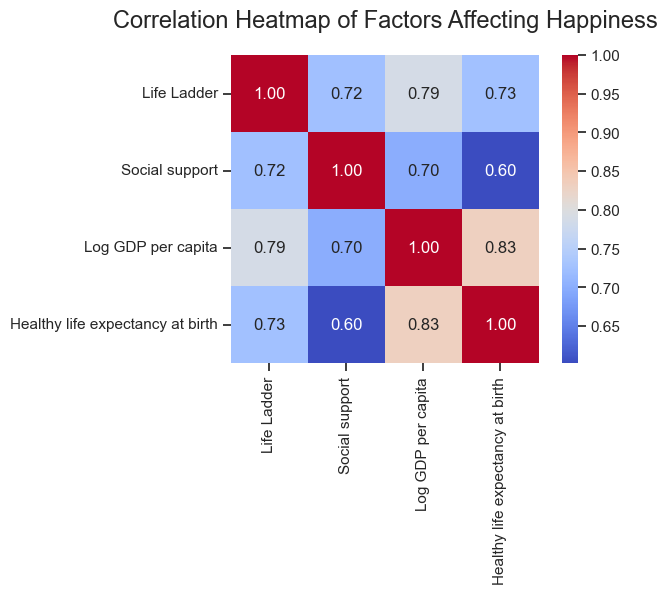

In [24]:
# Plotting the heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Factors Affecting Happiness', fontsize=17, pad=20)
plt.show()

### Key Insights:


- **Log GDP per capita** has the strongest impact on happiness, with a correlation of 0.79. This means that countries with higher income per person tend to be happier.

- **Healthy life expectancy at birth** is also important, with a correlation of 0.73. Longer, healthier lives lead to higher happiness.

- **Social support** has a strong effect too, with a correlation of 0.72. People who have support from others are generally happier.

### Question 6: What is the relationship between GDP and happiness?

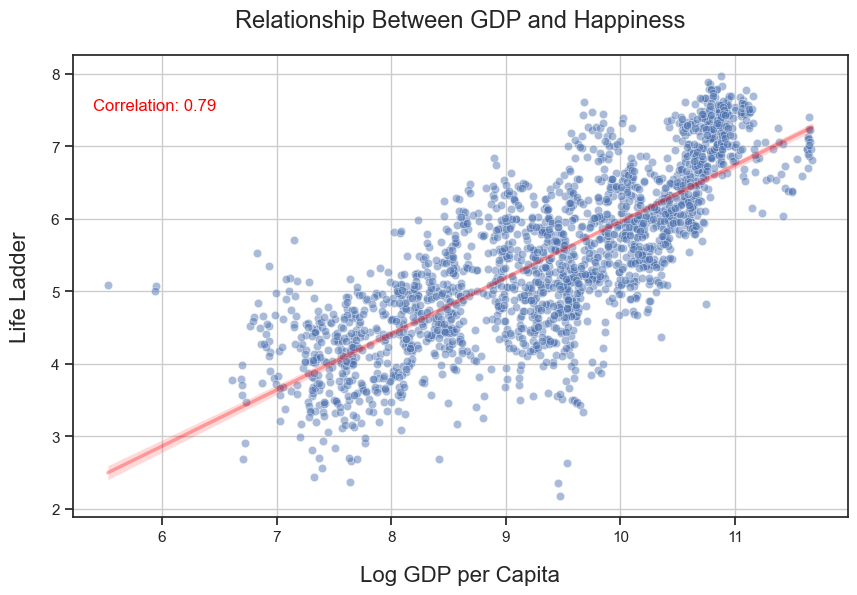

In [25]:
#Scatter plot to show the relationship between Log GDP per capita and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Log GDP per capita', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Log GDP per capita', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between GDP and Happiness', fontsize=17, pad=20)
plt.xlabel('Log GDP per Capita', fontsize=16, labelpad=15)
plt.ylabel('Life Ladder', fontsize=16, labelpad=15)
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Log GDP per capita'].corr(df_cleaned['Life Ladder'])
plt.text(5.4,7.5, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

### Key Insights:

- The chart shows a positive relationship between GDP per capita and happiness.

- As GDP goes up, happiness also tends to increase.

- The correlation is 0.79, meaning there is a strong relationship. 

- Countries with more money usually have happier people, but GDP is not the only factor.

- In short, more wealth leads to more happiness, but other things matter too.

### Question 7: How do perceptions of corruption correlate with happiness?

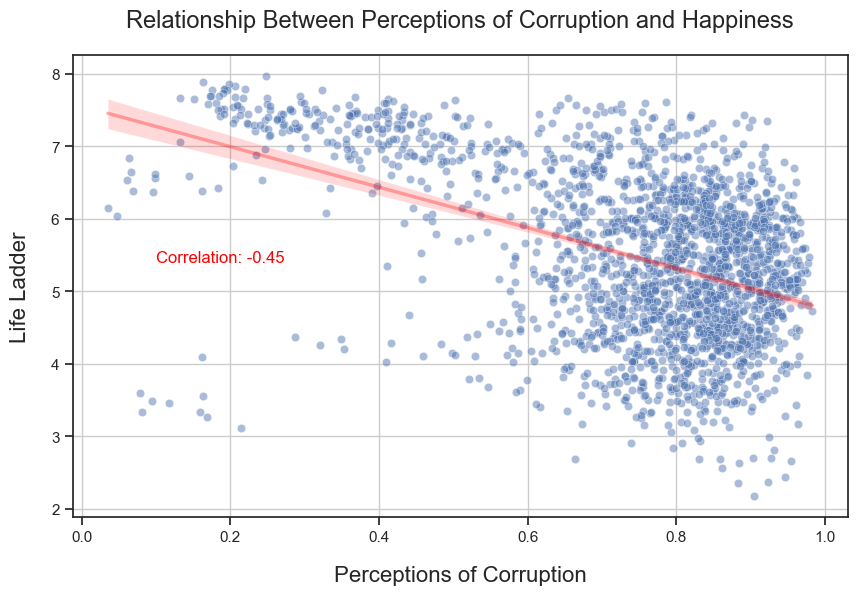

In [26]:
# Scatter plot to show the relationship between Perceptions of Corruption and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Perceptions of corruption', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Perceptions of corruption', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between Perceptions of Corruption and Happiness', fontsize=17, pad=20)
plt.xlabel('Perceptions of Corruption', fontsize=16, labelpad=15)
plt.ylabel('Life Ladder', fontsize=16, labelpad=15)
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Perceptions of corruption'].corr(df_cleaned['Life Ladder'])
plt.text(0.1, 5.4, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

### Key Insights:

- The chart shows a negative relationship between perceptions of corruption and happiness.

- As corruption increases, happiness tends to go down.

-  The correlation is -0.45, showing a moderate relationship. This means that in places where people feel there is more corruption, happiness is usually lower. 

- However, corruption is not the only factor affecting happiness. In summary, less corruption generally means more happiness, but it's not the only thing that matters.

### Question 8: How do freedom to make life choices and happiness relate?

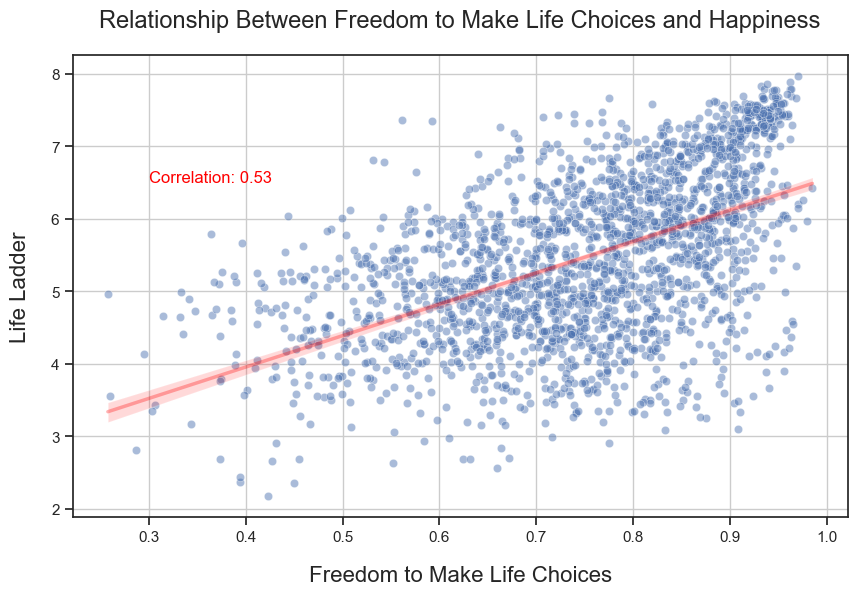

In [27]:
# Scatter plot to show the relationship between Freedom to make life choices and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Freedom to make life choices', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Freedom to make life choices', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between Freedom to Make Life Choices and Happiness', fontsize=17, pad=20)
plt.xlabel('Freedom to Make Life Choices', fontsize=16, labelpad=15)
plt.ylabel('Life Ladder', fontsize=16, labelpad=15)
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Freedom to make life choices'].corr(df_cleaned['Life Ladder'])
plt.text(0.3, 6.5, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

### Key Insights:

- The chart shows a positive relationship between freedom to make life choices and happiness.

- As freedom increases, happiness also tends to rise.

- The correlation is 0.53, indicating a moderate relationship. This means that people who feel they have more freedom to make their own choices in life generally report higher levels of happiness.

- However, other factors also play a role, as the correlation is not extremely strong. In summary, more freedom leads to higher happiness, but it’s not the only factor.

### Insights

- GDP per capita and social support are strongly correlated with happiness levels across countries.

- Countries with higher life expectancy are generally happier, which suggests that good healthcare is a critical component of happiness.

- Freedom to make life choices and lower perceptions of corruption also positively contribute to happiness.

- Geographic trends indicate that countries in Europe and North America tend to rank higher in happiness compared to those in Africa and parts of Asia.

- There are significant changes in happiness levels over time for some countries, which may reflect economic or political shifts.

### Conclusion

- The analysis of the World Happiness Report 2024 dataset reveals that happiness is influenced by a combination of economic social and individual factors.

- Higher GDP per capita, better social support, longer life expectancy and freedom of choice are all important contributors to a country's happiness.

- Moreover, corruption tends to negatively impact happiness levels.

- These insights suggest that policies promoting economic stability, healthcare, social support and transparency can potentially enhance the overall happiness of a nation.